In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Reading Raw data and data cleaning**

In [2]:
data_raw = pd.read_excel('linkedin_job_posts_insights.xlsx')
for i in data_raw.columns:
    if i != "date":
        data_raw[i]=data_raw[i].str.strip() 
print(data_raw.info())


from datetime import datetime
data_raw['date'] = pd.to_datetime(data_raw['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31597 entries, 0 to 31596
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   job_title        31571 non-null  object        
 1   company_name     30657 non-null  object        
 2   location         31588 non-null  object        
 3   hiring_status    31597 non-null  object        
 4   date             31597 non-null  datetime64[ns]
 5   seniority_level  30289 non-null  object        
 6   job_function     30007 non-null  object        
 7   employment_type  30006 non-null  object        
 8   industry         29586 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 2.2+ MB
None


In [3]:
def strdate(data_raw):
    '''
    returns day of week-month-year
    '''
    data_raw['date'] = pd.to_datetime(data_raw['date'])
    b=[]
    for i in range(len(data_raw['date'])):
        ts = data_raw['date'][i]
        
        p = ts.strftime('%y-%m')
        
#         if days of week is to be added
        p+="-0"+str(ts.dayofweek)
        b.append(p)
    return b


def addlabels(data):
    days = ["MON", "TUE", "WED", "THU", "FRI", "SAT" , "SUN"]
    dayno = np.arange(7)
    dict_ = {dayno[i]:days[i] for i in range(len(dayno))}
    for i in range(len(data)):
        plt.text(s=dict_[int(data.index[i][-2:])], x=i, y=data.iloc[i] )

# **Job Market Trends:**
* Job Posting Count over Time: Use a line chart to visualize the overall trend of job postings across time. This can reveal seasonal variations, economic impacts, and growth patterns in specific industries.
* Top Job Titles: Create a bar chart or pie chart to showcase the most frequently posted job titles. This can highlight in-demand skills and identify emerging job trends.
* Location Analysis: Utilize a choropleth map to visualize the geographical distribution of job postings. This can reveal regional job markets, potential relocation opportunities, and identify talent hubs.

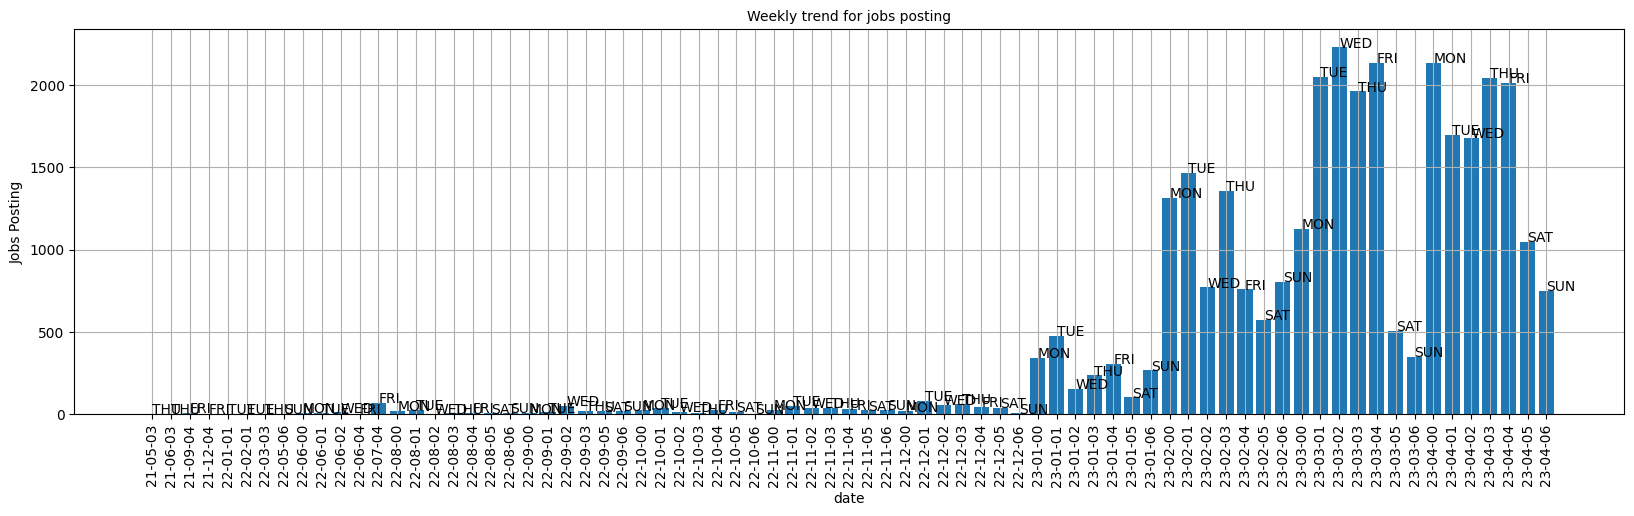

In [4]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime

data_job = data_raw

data_job['datestring'] = strdate(data_job)
test = data_job.groupby('datestring').size()
job_posting_time = test

fig, ax = plt.subplots(figsize=(20, 5))
# plt.plot(job_posting_time, color = 'red', marker = 'o')
plt.bar(x=job_posting_time.index,height=job_posting_time)
plt.title('Weekly trend for jobs posting', fontsize=10)
plt.xlabel('date', fontsize=10)
plt.ylabel('Jobs Posting', fontsize=10)

addlabels(job_posting_time)
plt.xticks(rotation=90)

plt.grid(True)
plt.show()

del data_job

It can be clearly observed that most of the job postings are on Mondays and Tuesdays, while weekends on less number of job postings are observed.
Also March 2023 observed a less number of job posting, can be a sign of hiring freeze across the verticals.

In [5]:
# defining the method to plot bar charts
def plot_bar(data, attr,n):
    data_job = data
    data_job[attr] = data_raw[attr].str.strip()
    test = data_job.groupby(attr).size()
    test = test.sort_values(ascending = False)
    test = test.iloc[:n]
    # print(test)


    fig, ax = plt.subplots(figsize=(n,4))
    
    plt.title(attr, fontsize=10)
    plt.bar(x=test.index,height= test)
    plt.xticks(rotation='vertical')

    del test
    del data_job
    
def plot_pie(data, attr,n):
    data_job = data
    data_job[attr] = data_raw[attr].str.strip()
    test = data_job.groupby(attr).size()
    test = test.sort_values(ascending = False)
    test = test.iloc[:n]
    # print(test)


    fig, ax = plt.subplots(figsize=(n,4))
    
    plt.title(attr, fontsize=10)
    plt.pie(test,labels= test.index)
    plt.xticks(rotation='vertical')

    del test
    del data_job

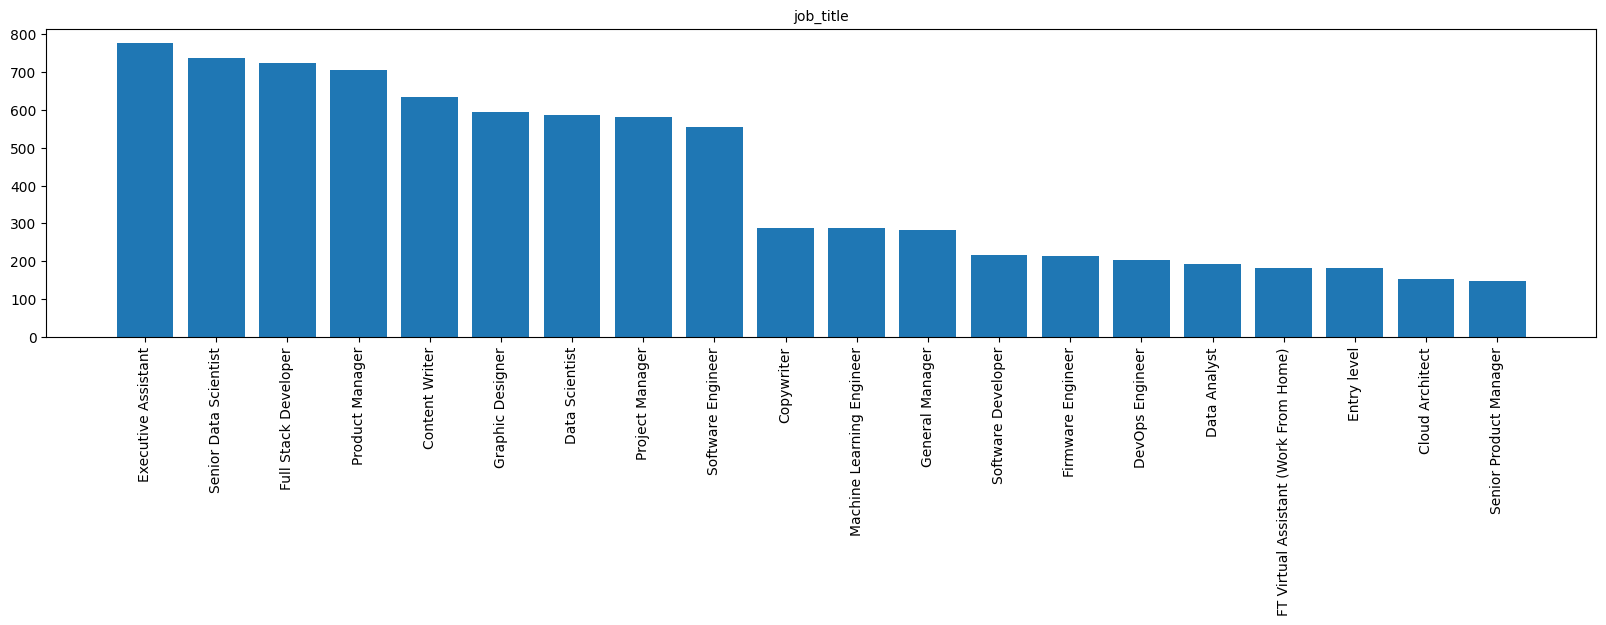

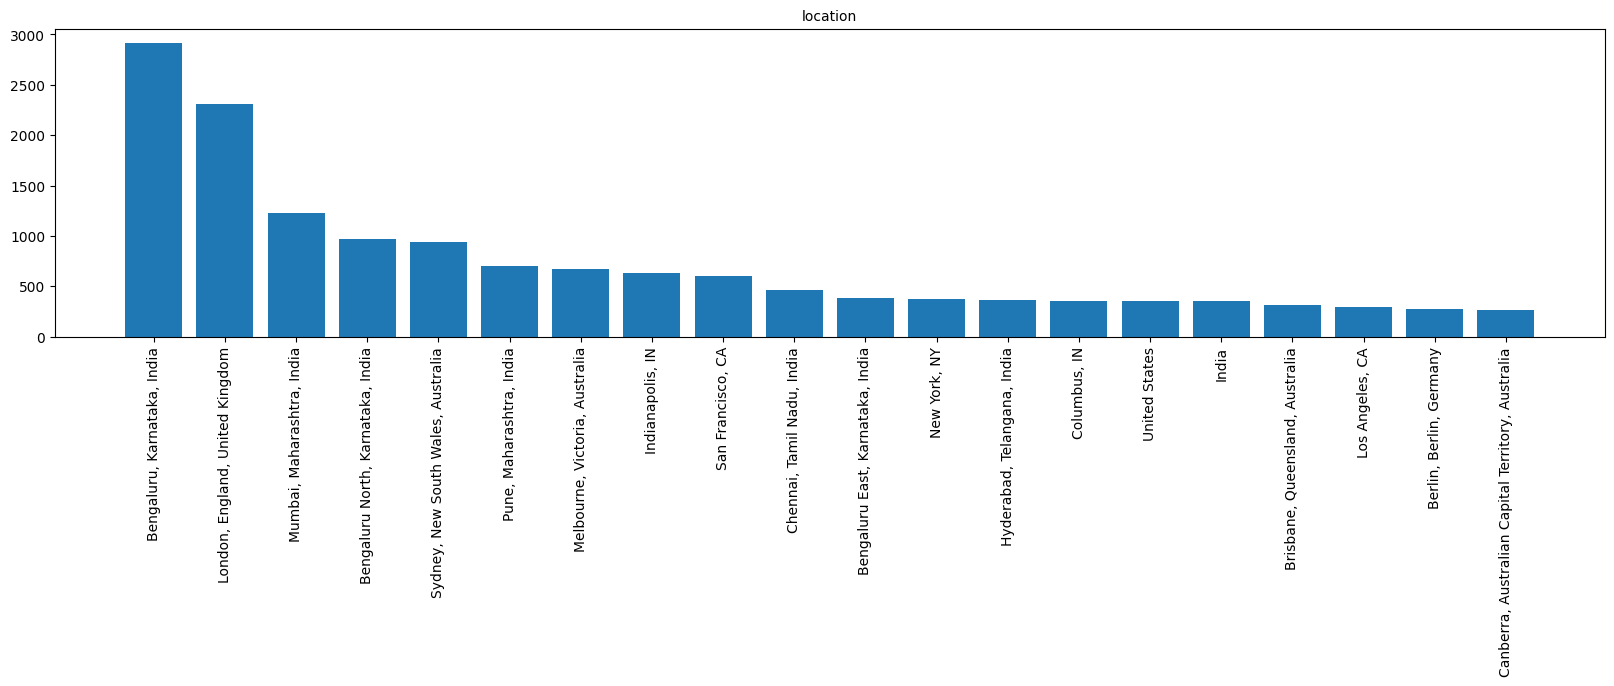

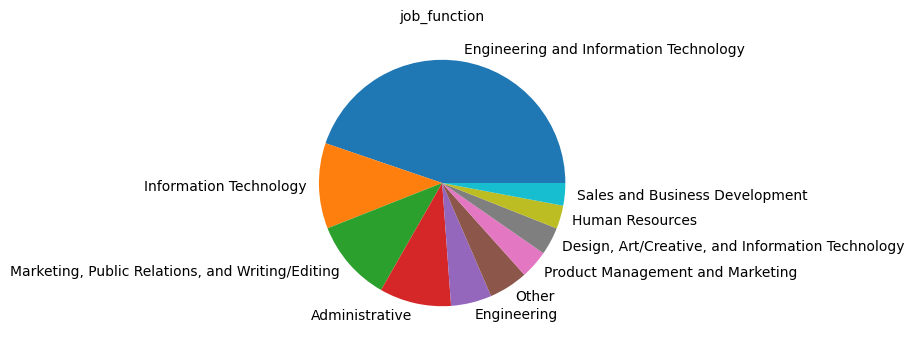

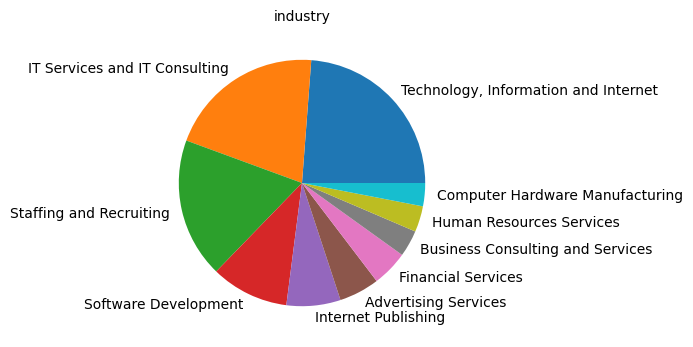

In [6]:
n=20
plot_bar(data_raw, "job_title", n)
plot_bar(data_raw, "location", n)
plot_pie(data_raw, "job_function", 10)
plot_pie(data_raw, "industry", 10)

* Executive assistant, data scientist, full stack engineer and product managers are top most required job profiles.
* Bengalore and London have the most job openings. further analysis can be done to find out what cities have what kind of job roles

# **Company Insights**:
* Top Hiring Companies: Employ a bar chart or pie chart to display the companies with the most active hiring based on the number of posted jobs. This can inform job seekers about top employers and potential career paths.     
* Company Comparison: Create a scatter plot or dual-axis chart to compare different companies based on the average seniority level and job function offered in their postings. This can provide insights into company culture and career progression opportunities. 

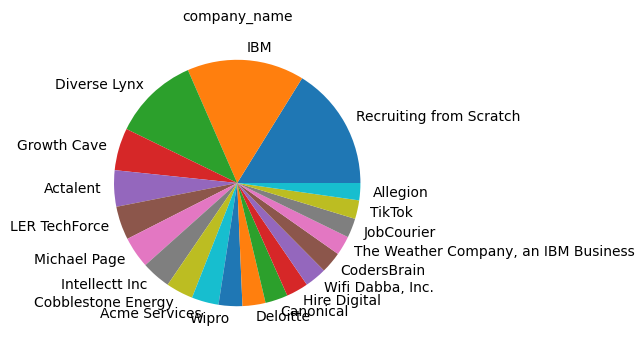

In [7]:
n=20
plot_pie(data_raw, "company_name", n)

# **Hiring Insights:**
* Seniority Level Distribution: Use a bar chart or histogram to visualize the distribution of job postings across different seniority levels (Entry-Level, Mid-Level, Senior-Level). This can reveal the demand for experienced professionals and opportunities for career growth.
* Job Function Breakdown: Employ a stacked bar chart or pie chart to showcase the percentage of job postings across different job functions (Marketing, Engineering, Sales, etc.). This can reveal industry-specific trends and dominant skill sets required.
* Hiring Status: Utilize a pie chart or donut chart to depict the proportion of open, closed, and other hiring statuses for job postings. This can provide insights into the overall hiring activity and potential competition for open positions.


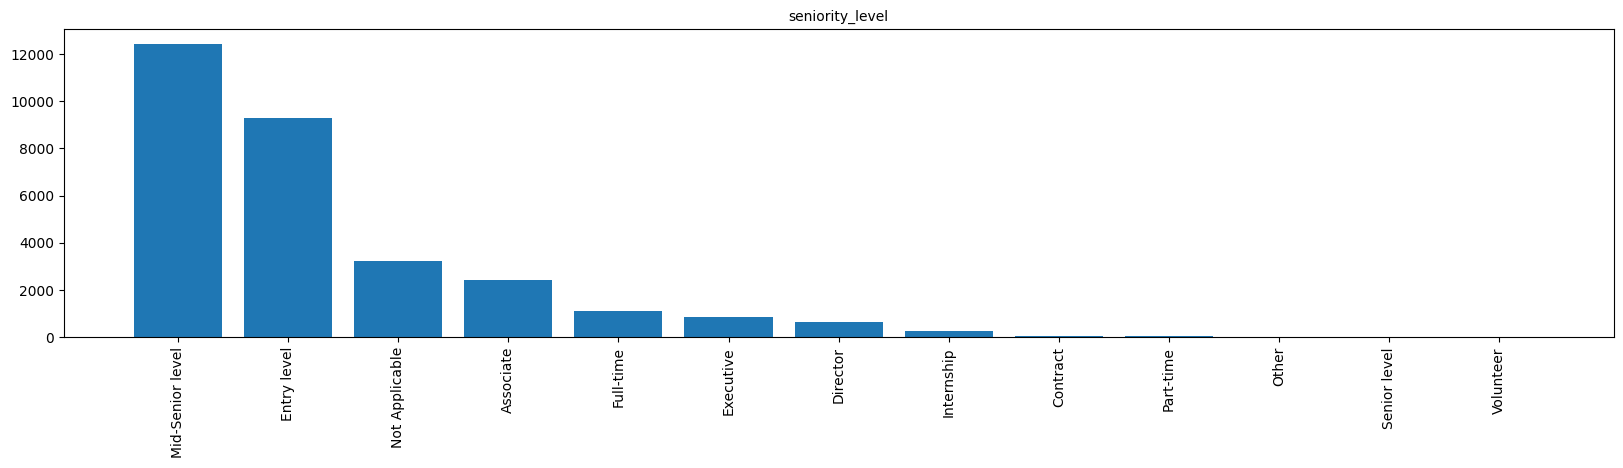

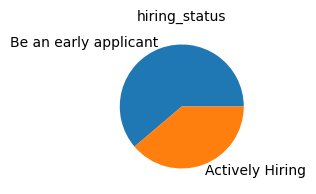

In [8]:
n=20

plot_bar(data_raw, "seniority_level", n)
plot_pie(data_raw, "hiring_status" , 2)

# create job function breakdown stacked bar chart with job function stacked as employment type

# **Additional analysis for future**

Combine visualizations: Create dashboards combining multiple charts to tell a comprehensive story about job market trends, company insights, and hiring dynamics.

Filter and drill down: Further analysis can be done to find out what cities have what kind of job roles

Interactive elements: Incorporate interactive elements like tooltips and dynamic filters to enhance user experience and facilitate data exploration.
